In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/assignment-dataset/Heart Disease - Heart Disease.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
df1 = df.copy()

In [6]:
df1.AgeCategory.unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelage = LabelEncoder()

In [9]:
df1['labelage'] = labelage.fit_transform(df['AgeCategory'])


In [10]:
df1['labelage']

0          7
1         12
2          9
3         11
4          4
          ..
319790     8
319791     3
319792     5
319793     1
319794    12
Name: labelage, Length: 319795, dtype: int64

In [11]:
df2 = df1.drop(['AgeCategory'],axis ='columns')

In [12]:
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,labelage
0,No,16.60,Yes,No,No,3,30,No,Female,White,Yes,Yes,Very good,5,Yes,No,Yes,7
1,No,20.34,No,No,Yes,0,0,No,Female,White,No,Yes,Very good,7,No,No,No,12
2,No,26.58,Yes,No,No,20,30,No,Male,White,Yes,Yes,Fair,8,Yes,No,No,9
3,No,24.21,No,No,No,0,0,No,Female,White,No,No,Good,6,No,No,Yes,11
4,No,23.71,No,No,No,28,0,Yes,Female,White,No,Yes,Very good,8,No,No,No,4


In [13]:
print(df2.shape)
target = df['HeartDisease']
target


(319795, 18)


0          No
1          No
2          No
3          No
4          No
         ... 
319790    Yes
319791     No
319792     No
319793     No
319794     No
Name: HeartDisease, Length: 319795, dtype: object

# label encoding

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
level_column = df2[['Smoking','AlcoholDrinking','Stroke', 'DiffWalking', 'Sex', 'Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']]
level_column

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,No,No,Yes,Male,Hispanic,Yes,No,Fair,Yes,No,No
319791,Yes,No,No,No,Male,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,Female,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,Female,Hispanic,No,No,Good,No,No,No


In [16]:
final_result = level_column.apply(le.fit_transform)

In [17]:
final_result.head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,1,0,0,0,0,5,2,1,4,1,0,1
1,0,0,1,0,0,5,0,1,4,0,0,0
2,1,0,0,0,1,5,2,1,1,1,0,0
3,0,0,0,0,0,5,0,0,2,0,0,1
4,0,0,0,1,0,5,0,1,4,0,0,0


In [18]:
df2[['Smoking','AlcoholDrinking','Stroke', 'DiffWalking', 'Sex', 'Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']] = final_result[['Smoking','AlcoholDrinking','Stroke', 'DiffWalking', 'Sex', 'Race','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']]

In [19]:
df2.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,labelage
0,No,16.60,1,0,0,3,30,0,0,5,2,1,4,5,1,0,1,7
1,No,20.34,0,0,1,0,0,0,0,5,0,1,4,7,0,0,0,12
2,No,26.58,1,0,0,20,30,0,1,5,2,1,1,8,1,0,0,9
3,No,24.21,0,0,0,0,0,0,0,5,0,0,2,6,0,0,1,11
4,No,23.71,0,0,0,28,0,1,0,5,0,1,4,8,0,0,0,4


In [20]:
final_result['Race'].unique()

array([5, 2, 1, 0, 4, 3])

<Axes: xlabel='HeartDisease'>

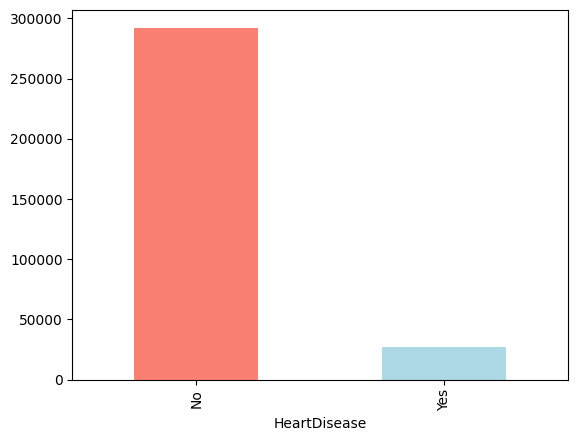

In [21]:
df2['HeartDisease'].value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [ ]:
# y = df2['HeartDisease']


In [22]:
level_y = df2[['HeartDisease']]


In [23]:
Y = level_y.apply(le.fit_transform)
Y.head(10)

,HeartDisease
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [24]:
X = df2.drop('HeartDisease',axis =1)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,labelage
0,16.60,1,0,0,3,30,0,0,5,2,1,4,5,1,0,1,7
1,20.34,0,0,1,0,0,0,0,5,0,1,4,7,0,0,0,12
2,26.58,1,0,0,20,30,0,1,5,2,1,1,8,1,0,0,9
3,24.21,0,0,0,0,0,0,0,5,0,0,2,6,0,0,1,11
4,23.71,0,0,0,28,0,1,0,5,0,1,4,8,0,0,0,4


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

print(f'x train shape {X_train.shape}')
print(f'x test shape {X_test.shape}')

x train shape (255836, 17)
x test shape (63959, 17)


# Scaler of the data

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(X_train)

StandardScaler()

In [28]:
scaled_x_train = scale.transform(X_train)
scaled_x_test = scale.transform(X_test)
print(scaled_x_train)

[[-0.59811475  1.1946717  -0.27056443 ... -0.19491574 -0.3207924
   1.25852047]
 [ 0.73656071  1.1946717  -0.27056443 ... -0.19491574 -0.3207924
  -0.14492514]
 [-0.11435399 -0.83705005 -0.27056443 ... -0.19491574 -0.3207924
  -0.98699251]
 ...
 [-1.38599873  1.1946717  -0.27056443 ... -0.19491574 -0.3207924
   0.4164531 ]
 [-0.46259871 -0.83705005 -0.27056443 ... -0.19491574 -0.3207924
  -0.42561426]
 [-0.40271952 -0.83705005 -0.27056443 ... -0.19491574 -0.3207924
  -1.82905987]]


In [29]:
scaled_x_train_data = pd.DataFrame(scaled_x_train, columns = df2.drop('HeartDisease', axis=1).columns)
scaled_x_train_data

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,labelage
0,-0.598115,1.194672,-0.270564,-0.198059,-0.172429,-0.490429,-0.402077,-0.950235,0.497309,-0.419233,0.539009,-0.795893,-0.763706,-0.393548,-0.194916,-0.320792,1.258520
1,0.736561,1.194672,-0.270564,-0.198059,-0.423890,-0.490429,-0.402077,1.052371,0.497309,-0.419233,0.539009,-1.447925,-0.067700,-0.393548,-0.194916,-0.320792,-0.144925
2,-0.114354,-0.837050,-0.270564,-0.198059,-0.423890,0.138415,-0.402077,1.052371,0.497309,-0.419233,0.539009,-1.447925,1.324311,-0.393548,-0.194916,-0.320792,-0.986993
3,0.058980,1.194672,-0.270564,-0.198059,-0.423890,1.270334,-0.402077,1.052371,0.497309,-0.419233,0.539009,-1.447925,0.628306,-0.393548,-0.194916,-0.320792,-0.425614
4,0.103102,1.194672,-0.270564,-0.198059,-0.423890,-0.490429,-0.402077,1.052371,0.497309,0.976914,0.539009,-0.143860,-0.067700,-0.393548,-0.194916,-0.320792,0.977831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255831,-0.687934,1.194672,-0.270564,-0.198059,-0.423890,-0.490429,2.487086,1.052371,0.497309,-0.419233,0.539009,1.160204,2.020317,-0.393548,-0.194916,3.117281,1.539210
255832,0.046374,1.194672,-0.270564,-0.198059,-0.423890,-0.490429,-0.402077,1.052371,0.497309,-0.419233,-1.855258,-1.447925,-0.067700,-0.393548,-0.194916,-0.320792,0.135764
255833,-1.385999,1.194672,-0.270564,-0.198059,3.348030,-0.490429,-0.402077,1.052371,0.497309,-0.419233,-1.855258,1.160204,-0.067700,-0.393548,-0.194916,-0.320792,0.416453
255834,-0.462599,-0.837050,-0.270564,-0.198059,-0.423890,0.138415,-0.402077,-0.950235,0.497309,-0.419233,0.539009,-0.143860,-0.067700,2.540984,-0.194916,-0.320792,-0.425614


In [30]:
scaled_x_train_data.shape

(255836, 17)

In [31]:
# scaled_x_test

In [32]:
scaled_x_test_data = pd.DataFrame(scaled_x_test, columns = df2.drop('HeartDisease', axis=1).columns)


In [ ]:
# scaled_x_test_data.shape

(63959, 17)

In [33]:
print(scaled_x_train_data.sample(10))
print(scaled_x_test_data.sample(10))

             BMI   Smoking  AlcoholDrinking    Stroke  PhysicalHealth  \
147652 -0.235688  1.194672        -0.270564 -0.198059        0.833417   
174300 -1.488424 -0.837050        -0.270564 -0.198059       -0.423890   
89286   0.255951 -0.837050         3.695977 -0.198059       -0.423890   
197651  0.151951 -0.837050        -0.270564 -0.198059        0.204763   
201685  0.388316 -0.837050        -0.270564 -0.198059       -0.172429   
212043  0.189769  1.194672        -0.270564  5.048989       -0.423890   
121842 -0.739934 -0.837050        -0.270564 -0.198059       -0.423890   
81971  -0.478356 -0.837050        -0.270564 -0.198059       -0.423890   
200737 -0.676903  1.194672        -0.270564 -0.198059       -0.423890   
211821  2.091721 -0.837050        -0.270564 -0.198059        3.348030   

        MentalHealth  DiffWalking       Sex      Race  Diabetic  \
147652     -0.364660     2.487086  1.052371  0.497309 -0.419233   
174300     -0.490429    -0.402077 -0.950235  0.497309 -0.41923

In [ ]:
from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


**Logistic regration**

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
LR_model = LogisticRegression()
LR_scaled_data = LR_model.fit(scaled_x_train_data, y_train)
LR_scaled_data

LR_scaled_data_predictions = LR_scaled_data.predict(scaled_x_test_data)
LR_scaled_data_predictions

print(accuracy_score(y_test, LR_scaled_data_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# LR_predictions  = LR.predict(X_test)
# LR_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
LR_scaled_data_predictions = LR_scaled_data.predict(scaled_x_test_data)
LR_scaled_data_predictions

array([0, 1, 0, ..., 0, 0, 0])

In [36]:
print(accuracy_score(y_test, LR_scaled_data_predictions))

0.916055598117544


# KNN

In [39]:
from sklearn.metrics import accuracy_score,classification_report

from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNN_model = KNeighborsClassifier(n_neighbors = 5)
KNN_Classifier_scaled_data = KNN_model.fit(scaled_x_train_data, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [41]:

# KNN_predictions = KNN_Classifier.predict(X_test)
KNN_predictions = KNN_Classifier_scaled_data.predict(scaled_x_test_data)

In [42]:
print(classification_report(y_test, KNN_predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58574
           1       0.35      0.13      0.19      5385

    accuracy                           0.91     63959
   macro avg       0.64      0.56      0.57     63959
weighted avg       0.88      0.91      0.89     63959



In [44]:
print(accuracy_score(y_test, KNN_predictions))

0.9062368079550962


**Naive bayes**

In [46]:
naive_bayes = GaussianNB()
naive_bayes_scaled = naive_bayes.fit(scaled_x_train_data, y_train)


naive_bayes_scaled_predictions = naive_bayes_scaled.predict(scaled_x_test_data)
naive_bayes_scaled_predictions

print(accuracy_score(y_test, naive_bayes_scaled_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.846198345815288


**DecisionTree**

In [47]:
DecisionTree = DecisionTreeClassifier()
DecisionTreeClassifier_scaled = DecisionTree.fit(scaled_x_train_data, y_train)


DecisionTreeClassifier_predictions = DecisionTreeClassifier_scaled.predict(scaled_x_test_data)
DecisionTreeClassifier_predictions

print(accuracy_score(y_test, DecisionTreeClassifier_predictions))

0.8669147422567582


**Random Forest**

In [48]:
RandomForest = RandomForestClassifier()
RandomForestClassifier_scaled = RandomForest.fit(scaled_x_train_data, y_train)


RandomForestClassifier_predictions = RandomForestClassifier_scaled.predict(scaled_x_test_data)


print(accuracy_score(y_test, RandomForestClassifier_predictions))

<ipython-input-48-e86d755c0e6d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestClassifier_scaled = RandomForest.fit(scaled_x_train_data, y_train)


0.9075657843305868


**AdaBoost**

In [50]:
AdaBoost = AdaBoostClassifier()
AdaBoostClassifier_scaled = RandomForest.fit(scaled_x_train_data, y_train)


AdaBoostClassifier_predictions = AdaBoostClassifier_scaled.predict(scaled_x_test_data)


<ipython-input-50-4ed6a08787e6>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  AdaBoostClassifier_scaled = RandomForest.fit(scaled_x_train_data, y_train)


NameError: name 'AdaBoostClassifiertClassifier_predictions' is not defined

In [51]:


print(accuracy_score(y_test, AdaBoostClassifier_predictions))

0.9078784846542316


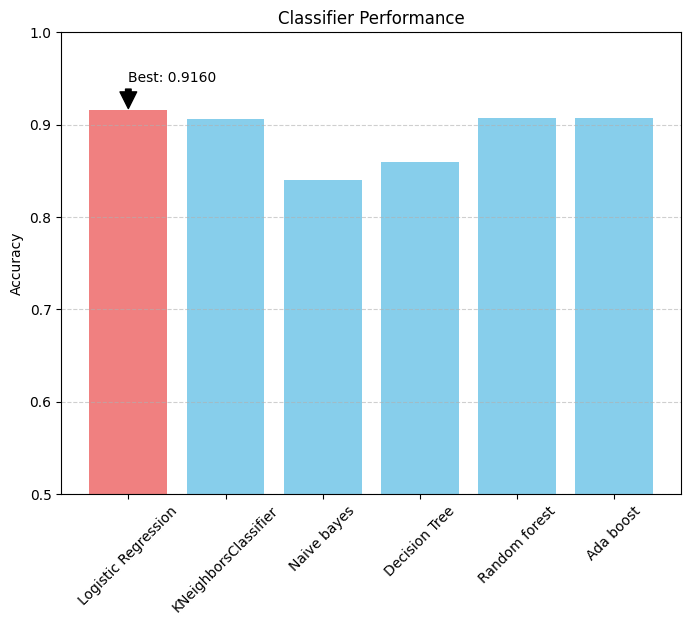

In [55]:
import matplotlib.pyplot as plt

# Define the classifiers and their respective accuracies
classifiers = ["Logistic Regression", "KNeighborsClassifier", "Naive bayes", "Decision Tree", "Random forest", "Ada boost"]
accuracies = [0.9160, 0.9062, 0.84, 0.86, 0.9074, 0.907]

# Find the index of the best accuracy
best_index = accuracies.index(max(accuracies))

# Create a list of colors, with the best classifier in a different color
colors = ['skyblue'] * len(classifiers)
colors[best_index] = 'lightcoral'

# Create a vertical bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, accuracies, color=colors)

# Annotate the best classifier with an arrow
plt.annotate(f'Best: {accuracies[best_index]:.4f}', xy=(best_index, accuracies[best_index]), xytext=(best_index, accuracies[best_index] + 0.03),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.ylim(0.5, 1)  # Adjusted limits to better fit the accuracy range
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()
